## Load model

In [ ]:
import pickle
model_name = "MODEL_70_Random_Forest_1x1_only_sa_npy.sav"
loaded_model = pickle.load(open(model_name, 'rb'))
print(loaded_model)

In [104]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [105]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*")
Sa1_files

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [296]:
X_input = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6"]
X_names = np.asarray(input_names)

Y_output = []

In [297]:
len(Sa1_files)

349

In [298]:
count = 0

In [299]:
for filename in Sa1_files:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File).flatten()
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File).flatten()
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File).flatten()
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File).flatten()
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File).flatten()
    
    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.load(Radar_File).flatten()
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        Y_output.append(Radararr[i])
        
        X_input.append(x)
    count += 1;
    if(count == 340):
        break

In [300]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [301]:
X_input.shape

(22282240, 5)

In [302]:
Y_output.shape

(22282240,)

## Visualize

In [303]:
def plotgraph(i):
    Y_test_predicted = loaded_model.predict(X_input)[(i*65536):((i+1)*65536)].reshape((256, 256))
    Y_true = Y_output[(i*65536):((i+1)*65536)].reshape((256, 256))
    plt.imshow(Y_test_predicted, cmap="gray")
    plt.show()
    Y_true = Y_output[(i*65536):((i+1)*65536)].reshape((256, 256))
    plt.imshow(Y_true, cmap="gray")
    plt.show()
    print("=====================================")

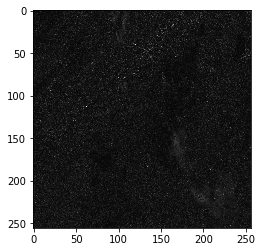

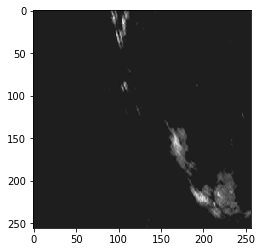

In [ ]:
for i in range(340):
    plotgraph(i)